# Taller ciencia de datos

In [2]:
#!pip install apyori
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

# Carga de datos

In [3]:
# Dataset Medicamentos
df_medicamentos = pd.read_csv("dim_medicamento.csv")
df_medicamentos.head()

,key_medicamento,version,date_from,date_to,codigo,Nombre Generico,Forma Farmaceutica,presentacion,Laboratorio y Registro,precio,Tipo Medicamento
0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2000-01-01 00:00:00,2018-12-31 23:59:59.999,1012.0,ACICLOVIR,Crema,50mg/g Envase con 10mg,MAVER 225M2001 SSA,3500.00,Genérico
2,2,1,2000-01-01 00:00:00,2018-12-31 23:59:59.999,1019.0,ACICLOVIR,Crema,50mg/g Envase con 2mg,MAVER 225M2001 SSA,3812.00,Genérico
3,3,1,2000-01-01 00:00:00,2018-12-31 23:59:59.999,1026.0,ACICLOVIR,Crema,50mg/g Envase con 5mg,MAVER 225M2001 SSA,4068.60,Comercial
4,4,1,2000-01-01 00:00:00,2018-12-31 23:59:59.999,1033.0,ACICLOVIR,Solución inyectable,250mg Envase con 5 frascos ámpula con liofilizado,PRECIMEX 220M92 SSA,4280.88,Comercial


In [4]:

# Dataset Medicamentos Recetados
df_medicamentos_recetados = pd.read_csv("medicamentos_recetados.csv")
df_medicamentos_recetados.head()


,key_med_recetados,key_date,codigo_formula,key_medicamento
0,1,2204,114000,214
1,2,2209,113256,36
2,3,2209,113257,45
3,4,2209,113257,65
4,5,2209,113257,86


## Merge entre ambos archivos para asociar los medicamentos recetados con sus nombres genéricos.

In [5]:
# Merge de los dos datasets
df_merged = df_medicamentos_recetados.merge(
    df_medicamentos,
    how='left',
    left_on='key_medicamento',
    right_on='key_medicamento')[['codigo_formula', 'Nombre Generico']]
df_merged.head()

,codigo_formula,Nombre Generico
0,114000,PARACETAMOL
1,113256,AMOXICILINA-CLAVULANATO
2,113257,BENCILPENICILINA SODICA CRISTALINA
3,113257,CIPROFLOXACINO
4,113257,CLORURO DE SODIO


## Los medicamentos se agrupan por el código de fórmula, creando una lista de medicamentos por cada receta médica.

In [6]:
# Lista de medicamentos por cada codigo de formula se hace una fila que tiene una lista de los medicamentos
lista_medicamentos_formula = []
for codigo_formula in df_merged['codigo_formula'].unique():
    lista_medicamentos_formula.append(
        df_merged[df_merged['codigo_formula'] == codigo_formula]['Nombre Generico'].values.tolist())




## Aplicación de algoritmo Apriori

In [7]:
rules = apriori(lista_medicamentos_formula, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)
results = list(rules)
results_df = pd.DataFrame(results)
results_df.head(30)

,items,support,ordered_statistics
0,"(ACICLOVIR, BENZOILO)",0.006280,"[((ACICLOVIR), (BENZOILO), 0.3197278911564626,..."
1,"(ACICLOVIR, CLIOQUINOL)",0.012026,"[((ACICLOVIR), (CLIOQUINOL), 0.612244897959183..."
2,"(ACICLOVIR, ÁCIDO RETINOICO)",0.012026,"[((ACICLOVIR), (ÁCIDO RETINOICO), 0.6122448979..."
3,"(BENCILPENICILINA BENZATINICA COMPUESTA, ALBEN...",0.005879,"[((ALBENDAZOL), (BENCILPENICILINA BENZATINICA ..."
4,"(POLIVITAMINAS Y MINERALES, ALBENDAZOL)",0.003875,"[((ALBENDAZOL), (POLIVITAMINAS Y MINERALES), 0..."
5,"(AMIKACINA, KETOROLACO)",0.017771,"[((AMIKACINA), (KETOROLACO), 0.488970588235294..."
6,"(AMIKACINA, VANCOMICINA)",0.036344,"[((AMIKACINA), (VANCOMICINA), 1.0, 27.51470588..."
7,"(BAÑO COLOIDE, AMIODARONA)",0.005612,"[((BAÑO COLOIDE), (AMIODARONA), 1.0, 12.411276..."
8,"(AMIODARONA, BUTILHIOSCINA)",0.022582,"[((AMIODARONA), (BUTILHIOSCINA), 0.28026533996..."
9,"(ETOMIDATO, AMIODARONA)",0.005612,"[((ETOMIDATO), (AMIODARONA), 0.333333333333333..."


## Visualización de resultados

In [8]:
# 1) putting output into a pandas dataframe
def inspect(output):
    lhs = [tuple(result[2][0][0])[0] for result in output]
    rhs = [tuple(result[2][0][1])[0] for result in output]
    support = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))


# 2) Segunda opcion de visualizacion de resultados
output = list(results)
output_DataFrame = pd.DataFrame(inspect(results), columns=[
    'Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'
])
output_DataFrame.head(30)


,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,ACICLOVIR,BENZOILO,0.006280,0.319728,18.265981
1,ACICLOVIR,CLIOQUINOL,0.012026,0.612245,33.445553
2,ACICLOVIR,ÁCIDO RETINOICO,0.012026,0.612245,31.170346
3,ALBENDAZOL,BENCILPENICILINA BENZATINICA COMPUESTA,0.005879,0.602740,21.583273
4,ALBENDAZOL,POLIVITAMINAS Y MINERALES,0.003875,0.397260,5.356930
5,AMIKACINA,KETOROLACO,0.017771,0.488971,27.514706
6,AMIKACINA,VANCOMICINA,0.036344,1.000000,27.514706
7,BAÑO COLOIDE,AMIODARONA,0.005612,1.000000,12.411277
8,AMIODARONA,BUTILHIOSCINA,0.022582,0.280265,12.411277
9,ETOMIDATO,AMIODARONA,0.005612,0.333333,4.137092


## Visualización de resultados gráficamente
Matriz de Calor

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

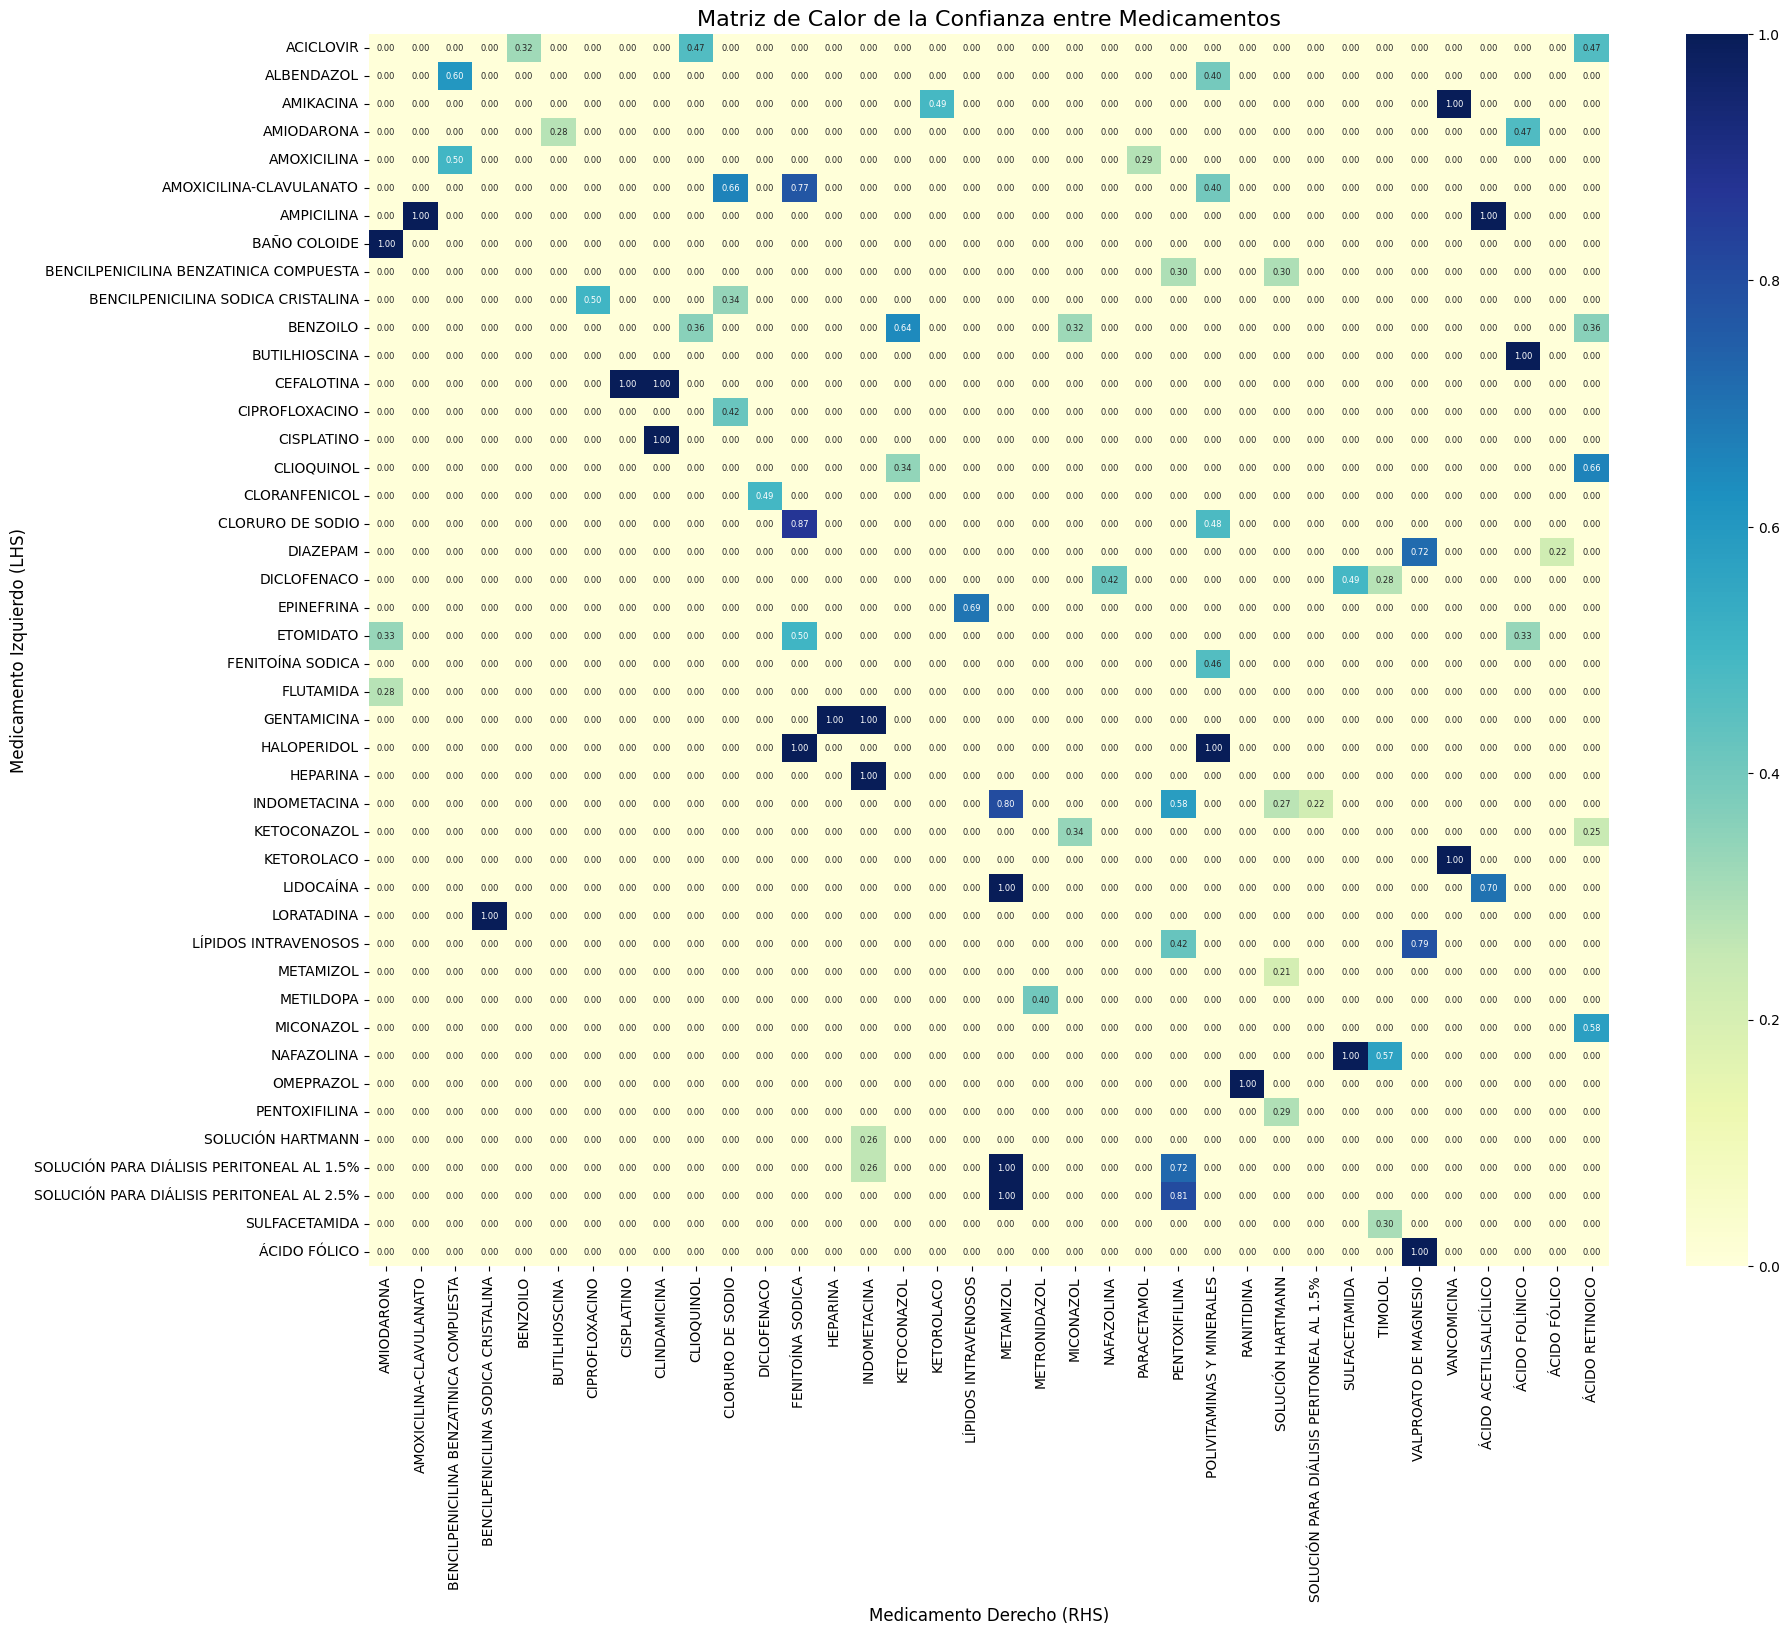

In [18]:
# Agrupar por LHS y RHS y calcular la confianza media
unique_rules = output_DataFrame.groupby(
    ['Left_Hand_Side', 'Right_Hand_Side']
).agg({'Confidence': 'mean'}).reset_index()

# Pivotear el DataFrame
heatmap_data = unique_rules.pivot(
    index='Left_Hand_Side',
    columns='Right_Hand_Side',
    values='Confidence'
).fillna(0)

# Crear la matriz de calor
plt.figure(figsize=(20, 16))  # Aumentar tamaño del gráfico
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 6})  # Reducir tamaño de las anotaciones
plt.title("Matriz de Calor de la Confianza entre Medicamentos", fontsize=16)
plt.ylabel("Medicamento Izquierdo (LHS)", fontsize=12)
plt.xlabel("Medicamento Derecho (RHS)", fontsize=12)
plt.savefig("matriz_calor.png", dpi=300, bbox_inches='tight')  # Guardar imagen
plt.show()

Gráfico de Burbujas

C:\Users\nathy\AppData\Local\Temp\ipykernel_2952\19862446.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


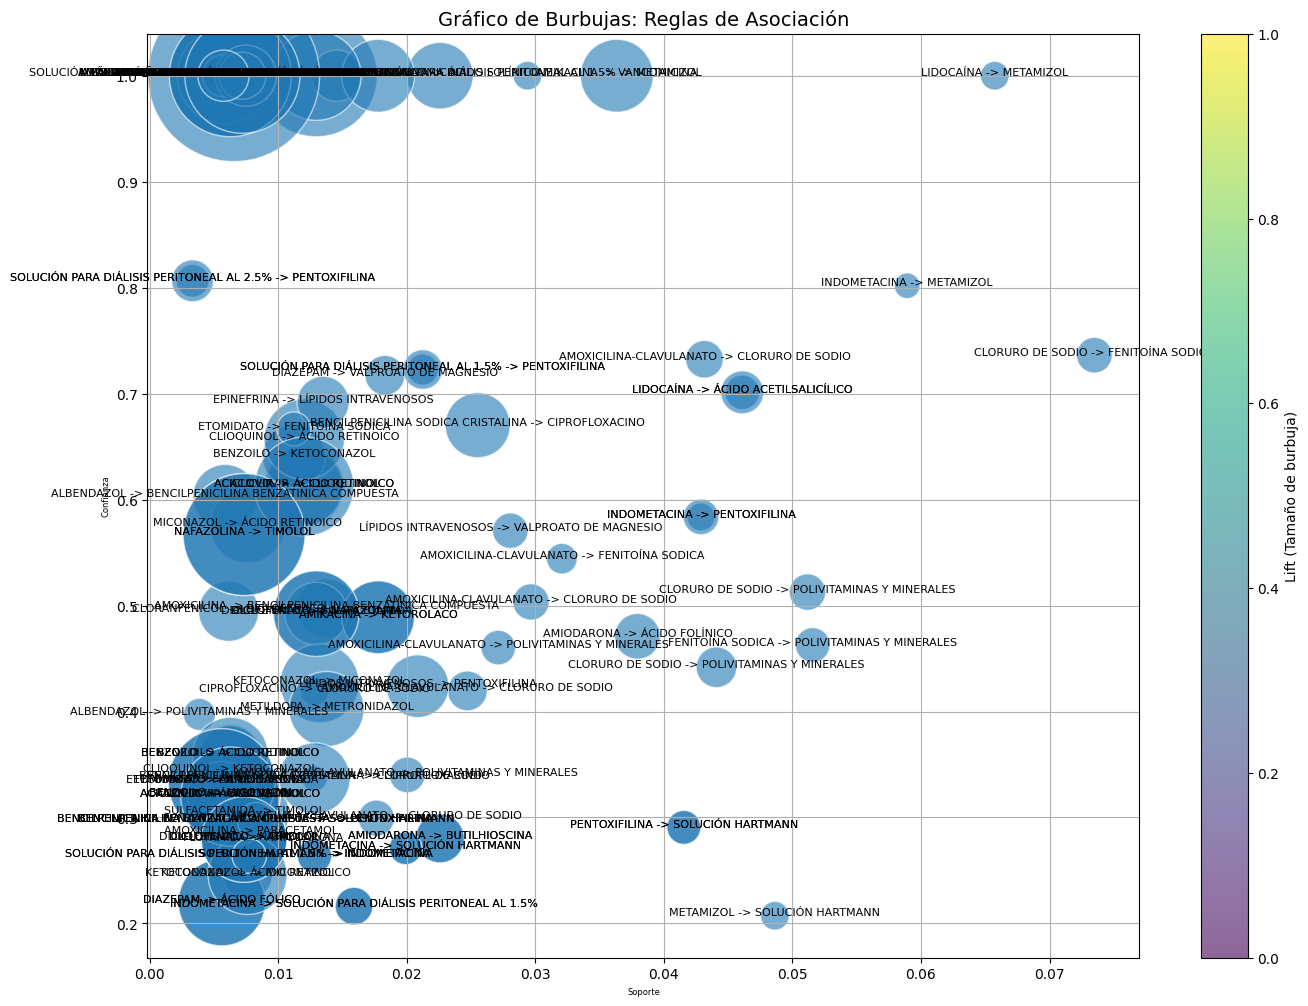

In [26]:
plt.figure(figsize=(16, 12))  # Tamaño del gráfico

# Crear el gráfico de burbujas
plt.scatter(
    output_DataFrame['Support'],
    output_DataFrame['Confidence'],
    s=output_DataFrame['Lift'] * 100,
    alpha=0.6, edgecolors="w", cmap='viridis'
)

# Agregar etiquetas a cada burbuja
for i in range(len(output_DataFrame)):
    plt.text(
        output_DataFrame['Support'].iloc[i],
        output_DataFrame['Confidence'].iloc[i],
        f"{output_DataFrame['Left_Hand_Side'].iloc[i]} -> {output_DataFrame['Right_Hand_Side'].iloc[i]}",
        fontsize=8, ha='center'
    )

# Configurar títulos y etiquetas
plt.title("Gráfico de Burbujas: Reglas de Asociación", fontsize=14)
plt.xlabel("Soporte", fontsize=6)
plt.ylabel("Confianza", fontsize=6)
plt.colorbar(label="Lift (Tamaño de burbuja)")
plt.grid(True)

# Guardar el gráfico
plt.savefig("grafico_burbujas.png", dpi=300, bbox_inches='tight')
plt.show()



Gráfico de Red

In [15]:
#!pip install networkx
import networkx as nx


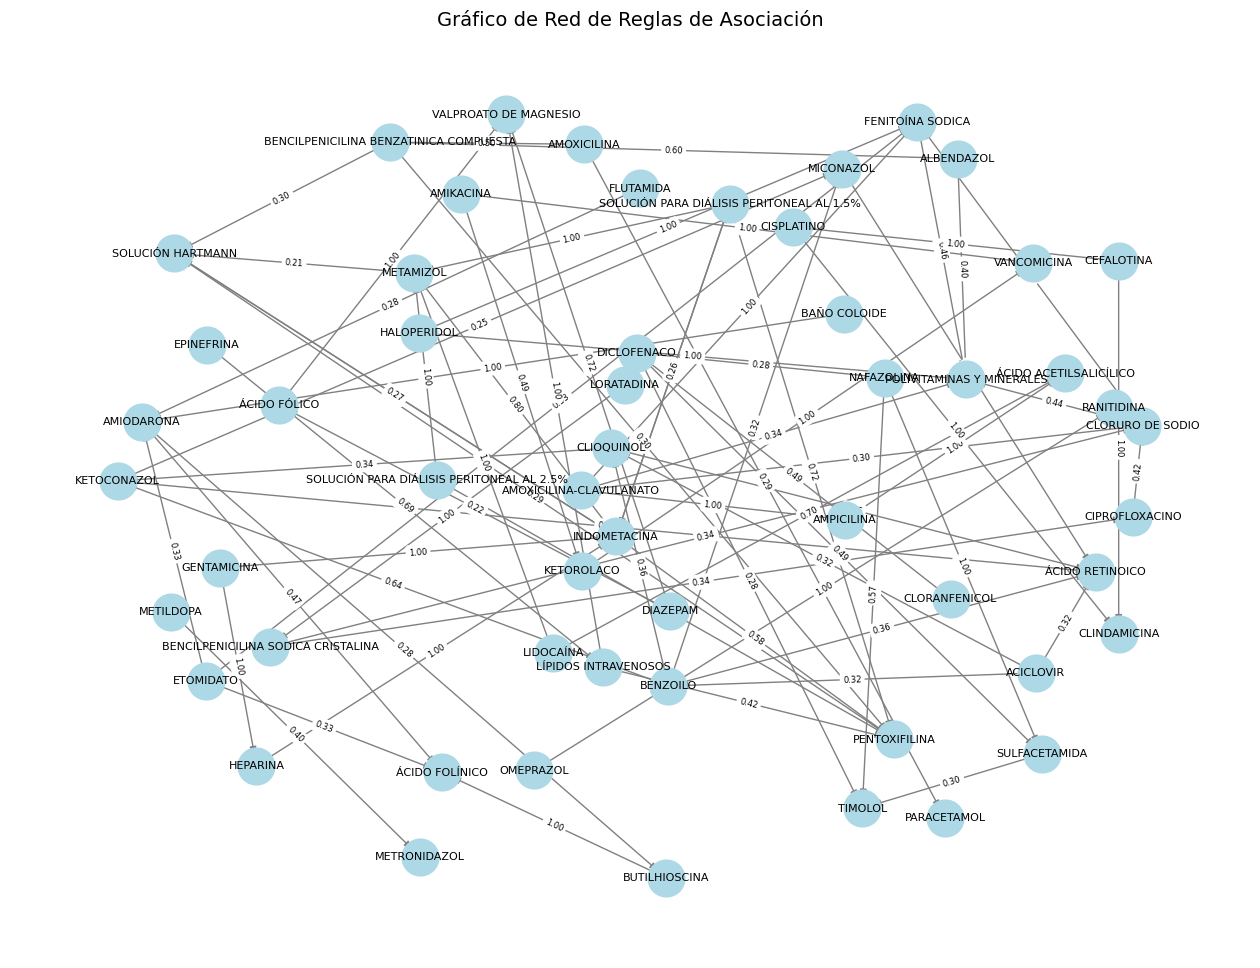

In [17]:
# Crear un grafo
G = nx.DiGraph()

# Agregar nodos y conexiones con pesos basados en la confianza
for _, row in output_DataFrame.iterrows():
    G.add_edge(
        row['Left_Hand_Side'],
        row['Right_Hand_Side'],
        weight=row['Confidence']
    )

# Dibujar el grafo
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, k=0.5, iterations=20)
edges = G.edges(data=True)

# Dibujar nodos y etiquetas con tamaño reducido
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=8)  # Reducir tamaño de las etiquetas

# Dibujar aristas con pesos basados en la confianza
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges}, font_size=6)

plt.title("Gráfico de Red de Reglas de Asociación", fontsize=14)  # Ajustar tamaño del título
plt.axis('off')
plt.savefig("grafico_red.png", dpi=300, bbox_inches='tight')  # Guardar imagen
plt.show()
